## 前情函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

tf.__version__

'2.0.0'

### numpy.random.sample(size=None)
np.random.sample(size=None) 是产生随机数的函数，size 用来指定产生的维度，如果不指定，则产生一个标量，产生数据的范围为 [0, 1)，size 的参数为整数或整数型元组

In [2]:
scalar = np.random.sample()
print('scalar value:', scalar)

matrix = np.random.sample((4, 4))
print('matrix value:\n', matrix)

scalar value: 0.8916937281165576
matrix value:
 [[0.21804301 0.23273453 0.1989421  0.91833431]
 [0.96301494 0.02083241 0.44543199 0.52984906]
 [0.59214349 0.20801405 0.41085002 0.01566343]
 [0.2869535  0.22004528 0.91109743 0.24408777]]


### tensorflow.data.Dataset.from_tensor_slices
tf.data.Dataset.from_tensor_slices((train, label)) 是将数据的特征与标签相对应，比如创建一个 6 行的矩阵，列数随便，那么就需要 6 列标签来与 6 行矩阵的每一行数据相对应，可以发现经过 tf.data.Dataset.from_tensor_slices() 后，可以发现每一行对应一个标签，每一行有三个数据，所以 data 的维度是 ((3,), (1,))

In [3]:
features, labels = (np.random.sample((6, 3)), np.random.sample((6, 1)))
 
print('features:\n', features, 
      '\nlabels:\n', labels)

data = tf.data.Dataset.from_tensor_slices((features, labels))
print(data)

features:
 [[0.79680143 0.7589638  0.21623016]
 [0.02987241 0.83818346 0.02416548]
 [0.3339702  0.7937907  0.36895411]
 [0.93513608 0.64110223 0.149116  ]
 [0.02685498 0.32784008 0.26686279]
 [0.92430634 0.76099528 0.08407499]] 
labels:
 [[0.76455789]
 [0.37542639]
 [0.93846915]
 [0.05775337]
 [0.48292575]
 [0.32334656]]
<TensorSliceDataset shapes: ((3,), (1,)), types: (tf.float64, tf.float64)>


我们以 cifar10 的数据为例，train一共有 50000 个数据，每一个数据是一个三通道的图像 32x32x3，train 的标签也是 50000 条数据，所以数据与标签之间一一对应，所以 32x32x3 的图像对应一个标签，data 的输出就是 (32, 32, 3), (1,)

In [4]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train length:', len(x_train),
      '\nx_train shape:', x_train.shape,
      '\nx_test length:', len(x_test),
      '\nx_test shape:', x_test.shape)

data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
print(data)

x_train length: 50000 
x_train shape: (50000, 32, 32, 3) 
x_test length: 10000 
x_test shape: (10000, 32, 32, 3)
<TensorSliceDataset shapes: ((32, 32, 3), (1,)), types: (tf.uint8, tf.uint8)>


### TensorFlow dataset 中 shuffle()、repeat()、batch()、prefetch()
repeat(count=None) 重复此数据集 count 次，如果 count 是 None 或 -1 则是无限期重复的，返回一个 Dataset 类型，为了配合输出次数，一般默认 repeat() 为空  
  
batch(batch_size, drop_remainder=False) 按照顺序取出 batch_size 大小数据，最后一次输出可能小于batch 如果程序指定了每次必须输入进批次的大小，那么应将drop_remainder 设置为 True 以防止产生较小的批次，默认为 False
  
shuffle(buffer_size, seed=None, reshuffle_each_iteration=None) 将数据打乱，数值越大，混乱程度越大，为了完全打乱，buffer_size 应等于数据集的数量，如果数据集包含 10000 个元素但 buffer_size 设置为 1000，则shuffle最初将仅打乱这前 1000 个，读取完毕后将在进行后续打乱  
buffer_size：表示此数据集中要从中采样新数据集的元素数 int
seed：（可选）表示用于创建分布的随机种子 int
reshuffle_each_iteration：（可选）布尔值，如果为true，则表示每次迭代数据集时都应进行伪随机重排(默认为True)
返回值：  
Dataset：A Dataset
  
prefetch(buffer_size) 创建一个Dataset从该数据集中预提取元素的，注意：examples.prefetch(2) 将预取2个元素（2个示例），而examples.batch(20).prefetch(2) 将预取2个元素（2个批次，每个20个示例），buffer_size 表示预取时将缓冲的最大元素数，返回 Dataset
  
**repeat()不进行代码展示，因为不能可视化**

In [5]:
features, labels = (np.random.sample((10, 3)), np.random.sample((10, 1)))

data = tf.data.Dataset.from_tensor_slices((features, labels))

In [6]:
data_batch = data.batch(4)
for step, (batch_x, batch_y) in enumerate(data_batch.take(1), 1):
    print('features:\n', batch_x, '\nlabels:\n', batch_y)

features:
 tf.Tensor(
[[0.55558959 0.51862803 0.79967034]
 [0.63969568 0.97605433 0.94048536]
 [0.1573988  0.02895822 0.40891006]
 [0.24109004 0.35168058 0.4326879 ]], shape=(4, 3), dtype=float64) 
labels:
 tf.Tensor(
[[0.67783353]
 [0.96823252]
 [0.47094708]
 [0.09315025]], shape=(4, 1), dtype=float64)


In [7]:
data_shuffle = data.shuffle(2)
for step, (batch_x, batch_y) in enumerate(data_shuffle.take(4), 1):
    print('features:', batch_x, 'labels:', batch_y)

print(('******************************************************************line'
       '******************************************************************'))

for step, (batch_x, batch_y) in enumerate(data.take(4), 1):
    print('features:', batch_x, 'labels:', batch_y)

features: tf.Tensor([0.63969568 0.97605433 0.94048536], shape=(3,), dtype=float64) labels: tf.Tensor([0.96823252], shape=(1,), dtype=float64)
features: tf.Tensor([0.1573988  0.02895822 0.40891006], shape=(3,), dtype=float64) labels: tf.Tensor([0.47094708], shape=(1,), dtype=float64)
features: tf.Tensor([0.55558959 0.51862803 0.79967034], shape=(3,), dtype=float64) labels: tf.Tensor([0.67783353], shape=(1,), dtype=float64)
features: tf.Tensor([0.24109004 0.35168058 0.4326879 ], shape=(3,), dtype=float64) labels: tf.Tensor([0.09315025], shape=(1,), dtype=float64)
******************************************************************line******************************************************************
features: tf.Tensor([0.55558959 0.51862803 0.79967034], shape=(3,), dtype=float64) labels: tf.Tensor([0.67783353], shape=(1,), dtype=float64)
features: tf.Tensor([0.63969568 0.97605433 0.94048536], shape=(3,), dtype=float64) labels: tf.Tensor([0.96823252], shape=(1,), dtype=float64)
features: t

只提取两个数据，每次打出一个，一个只有一行

In [8]:
data_pre = data.prefetch(2)
for step, (batch_x, batch_y) in enumerate(data_pre.take(1), 1):
    print('features:', batch_x, 'labels:', batch_y)

features: tf.Tensor([0.55558959 0.51862803 0.79967034], shape=(3,), dtype=float64) labels: tf.Tensor([0.67783353], shape=(1,), dtype=float64)


只提取两个数据，每次打出一个，但是具有 batch，一个有 5 行数据

In [9]:
data_bat_pre = data.batch(5).prefetch(2)
for step, (batch_x, batch_y) in enumerate(data_bat_pre.take(1), 1):
    print('features:\n', batch_x, '\nlabels:\n', batch_y)

features:
 tf.Tensor(
[[0.55558959 0.51862803 0.79967034]
 [0.63969568 0.97605433 0.94048536]
 [0.1573988  0.02895822 0.40891006]
 [0.24109004 0.35168058 0.4326879 ]
 [0.32295129 0.4973173  0.20489247]], shape=(5, 3), dtype=float64) 
labels:
 tf.Tensor(
[[0.67783353]
 [0.96823252]
 [0.47094708]
 [0.09315025]
 [0.17250509]], shape=(5, 1), dtype=float64)


## 正式开始

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

tf.__version__

'2.0.0'

### 读取数据

In [11]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 数据预处理与参数设置

In [12]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
train_num = len(x_train)
num_classes = 10

learning_rate = 0.0001
batch_size = 64
training_steps = 20000
display_step = 20

conv1_filters = 32
conv2_filters = 64
fc1_units = 256

### 设置读入的模式

In [13]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 定义卷积，池化操作

In [14]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

### 定义全连接层参数

In [15]:
random_normal = tf.initializers.RandomNormal()

weights = {
    'wc1': tf.Variable(random_normal([3, 3, 3, conv1_filters])),
    'wc2': tf.Variable(random_normal([3, 3, conv1_filters, conv2_filters])),
    'wd1': tf.Variable(random_normal([4096, fc1_units])),
    'out': tf.Variable(random_normal([fc1_units, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.zeros([conv1_filters])),
    'bc2': tf.Variable(tf.zeros([conv2_filters])),
    'bd1': tf.Variable(tf.zeros([fc1_units])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

### 定义前向运算

In [16]:
def conv_net(x):
    x = tf.reshape(x, [-1, 32, 32, 3])
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    pool1 = maxpool2d(conv1, k=2)
    conv2 = conv2d(pool1, weights['wc2'], biases['bc2'])
    pool2 = maxpool2d(conv2, k=2)
    flat = tf.reshape(pool2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(flat, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return tf.nn.softmax(out)

### 定义损失函数与准确率

In [17]:
def cross_entropy(y_pred, y_true):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    loss_ = tf.keras.losses.sparse_categorical_crossentropy(y_true=y_true, y_pred=y_pred)
    
    return tf.reduce_mean(loss_)


def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.reshape(tf.cast(y_true, tf.int64), [-1]))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.optimizers.Adam(learning_rate)

### 梯度下降

In [18]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = conv_net(x)
        loss = cross_entropy(pred, y)
        
    trainable_variables = list(weights.values()) + list(biases.values())

    gradients = g.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

### 开始训练

In [19]:
train_loss_list = []
train_acc_list = []

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = conv_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        train_loss_list.append(loss)
        train_acc_list.append(acc)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 20, loss: 2.276385, accuracy: 0.265625
step: 40, loss: 2.242373, accuracy: 0.250000
step: 60, loss: 2.208631, accuracy: 0.281250
step: 80, loss: 2.170714, accuracy: 0.343750
step: 100, loss: 2.118475, accuracy: 0.406250
step: 120, loss: 2.037787, accuracy: 0.328125
step: 140, loss: 2.089103, accuracy: 0.281250
step: 160, loss: 2.050472, accuracy: 0.203125
step: 180, loss: 1.929926, accuracy: 0.234375
step: 200, loss: 1.893998, accuracy: 0.375000
step: 220, loss: 1.854106, accuracy: 0.328125
step: 240, loss: 1.854870, accuracy: 0.437500
step: 260, loss: 1.848358, accuracy: 0.390625
step: 280, loss: 1.851551, accuracy: 0.281250
step: 300, loss: 1.759102, accuracy: 0.437500
step: 320, loss: 1.938205, accuracy: 0.343750
step: 340, loss: 1.659537, accuracy: 0.390625
step: 360, loss: 1.758072, accuracy: 0.359375
step: 380, loss: 1.796415, accuracy: 0.390625
step: 400, loss: 1.700016, accuracy: 0.390625
step: 420, loss: 1.553300, accuracy: 0.421875
step: 440, loss: 1.748674, accuracy: 0

step: 3540, loss: 1.401286, accuracy: 0.531250
step: 3560, loss: 1.098115, accuracy: 0.687500
step: 3580, loss: 1.162318, accuracy: 0.593750
step: 3600, loss: 1.186576, accuracy: 0.578125
step: 3620, loss: 1.336187, accuracy: 0.515625
step: 3640, loss: 1.111418, accuracy: 0.578125
step: 3660, loss: 1.126912, accuracy: 0.562500
step: 3680, loss: 1.107249, accuracy: 0.640625
step: 3700, loss: 1.204506, accuracy: 0.578125
step: 3720, loss: 1.010100, accuracy: 0.625000
step: 3740, loss: 1.088903, accuracy: 0.609375
step: 3760, loss: 1.195765, accuracy: 0.671875
step: 3780, loss: 1.226634, accuracy: 0.578125
step: 3800, loss: 1.241634, accuracy: 0.625000
step: 3820, loss: 1.265998, accuracy: 0.593750
step: 3840, loss: 1.185825, accuracy: 0.609375
step: 3860, loss: 1.093392, accuracy: 0.671875
step: 3880, loss: 1.014271, accuracy: 0.687500
step: 3900, loss: 1.157101, accuracy: 0.625000
step: 3920, loss: 1.161644, accuracy: 0.515625
step: 3940, loss: 1.201814, accuracy: 0.593750
step: 3960, l

step: 7040, loss: 0.967251, accuracy: 0.718750
step: 7060, loss: 1.087622, accuracy: 0.562500
step: 7080, loss: 0.984223, accuracy: 0.625000
step: 7100, loss: 1.071772, accuracy: 0.656250
step: 7120, loss: 0.815130, accuracy: 0.718750
step: 7140, loss: 0.974542, accuracy: 0.656250
step: 7160, loss: 0.775125, accuracy: 0.718750
step: 7180, loss: 0.957779, accuracy: 0.703125
step: 7200, loss: 0.734328, accuracy: 0.734375
step: 7220, loss: 1.018757, accuracy: 0.671875
step: 7240, loss: 0.946163, accuracy: 0.703125
step: 7260, loss: 0.722667, accuracy: 0.796875
step: 7280, loss: 1.087558, accuracy: 0.656250
step: 7300, loss: 0.847729, accuracy: 0.718750
step: 7320, loss: 1.002224, accuracy: 0.640625
step: 7340, loss: 1.067971, accuracy: 0.671875
step: 7360, loss: 0.887718, accuracy: 0.671875
step: 7380, loss: 1.045760, accuracy: 0.562500
step: 7400, loss: 0.887065, accuracy: 0.671875
step: 7420, loss: 0.859414, accuracy: 0.765625
step: 7440, loss: 1.007464, accuracy: 0.625000
step: 7460, l

step: 10520, loss: 0.794537, accuracy: 0.765625
step: 10540, loss: 0.823349, accuracy: 0.718750
step: 10560, loss: 0.720228, accuracy: 0.812500
step: 10580, loss: 0.880850, accuracy: 0.671875
step: 10600, loss: 0.807551, accuracy: 0.734375
step: 10620, loss: 0.993610, accuracy: 0.687500
step: 10640, loss: 0.813218, accuracy: 0.703125
step: 10660, loss: 0.866734, accuracy: 0.687500
step: 10680, loss: 0.865751, accuracy: 0.750000
step: 10700, loss: 0.905100, accuracy: 0.671875
step: 10720, loss: 0.816091, accuracy: 0.703125
step: 10740, loss: 0.927788, accuracy: 0.703125
step: 10760, loss: 1.134274, accuracy: 0.578125
step: 10780, loss: 1.016891, accuracy: 0.609375
step: 10800, loss: 0.867915, accuracy: 0.750000
step: 10820, loss: 1.045817, accuracy: 0.656250
step: 10840, loss: 0.735716, accuracy: 0.796875
step: 10860, loss: 0.872739, accuracy: 0.640625
step: 10880, loss: 0.893893, accuracy: 0.640625
step: 10900, loss: 0.729596, accuracy: 0.828125
step: 10920, loss: 0.917841, accuracy: 0

step: 13940, loss: 0.930254, accuracy: 0.687500
step: 13960, loss: 0.770892, accuracy: 0.750000
step: 13980, loss: 0.842271, accuracy: 0.703125
step: 14000, loss: 0.821263, accuracy: 0.687500
step: 14020, loss: 0.806356, accuracy: 0.781250
step: 14040, loss: 0.702838, accuracy: 0.765625
step: 14060, loss: 0.839455, accuracy: 0.656250
step: 14080, loss: 0.810081, accuracy: 0.687500
step: 14100, loss: 0.770759, accuracy: 0.750000
step: 14120, loss: 0.692215, accuracy: 0.812500
step: 14140, loss: 0.866652, accuracy: 0.718750
step: 14160, loss: 0.733007, accuracy: 0.750000
step: 14180, loss: 0.843458, accuracy: 0.734375
step: 14200, loss: 1.039164, accuracy: 0.562500
step: 14220, loss: 0.790810, accuracy: 0.750000
step: 14240, loss: 0.610063, accuracy: 0.796875
step: 14260, loss: 0.852136, accuracy: 0.656250
step: 14280, loss: 0.758126, accuracy: 0.734375
step: 14300, loss: 0.747125, accuracy: 0.750000
step: 14320, loss: 0.769181, accuracy: 0.671875
step: 14340, loss: 0.809205, accuracy: 0

step: 17360, loss: 0.706935, accuracy: 0.765625
step: 17380, loss: 0.868747, accuracy: 0.734375
step: 17400, loss: 0.657353, accuracy: 0.765625
step: 17420, loss: 0.773056, accuracy: 0.796875
step: 17440, loss: 0.586928, accuracy: 0.859375
step: 17460, loss: 0.873968, accuracy: 0.734375
step: 17480, loss: 0.701657, accuracy: 0.765625
step: 17500, loss: 0.724700, accuracy: 0.796875
step: 17520, loss: 0.815874, accuracy: 0.703125
step: 17540, loss: 0.807460, accuracy: 0.687500
step: 17560, loss: 0.806705, accuracy: 0.781250
step: 17580, loss: 0.721791, accuracy: 0.765625
step: 17600, loss: 0.694165, accuracy: 0.828125
step: 17620, loss: 0.693135, accuracy: 0.796875
step: 17640, loss: 0.824873, accuracy: 0.734375
step: 17660, loss: 0.661743, accuracy: 0.843750
step: 17680, loss: 0.668941, accuracy: 0.781250
step: 17700, loss: 0.447876, accuracy: 0.906250
step: 17720, loss: 0.607572, accuracy: 0.781250
step: 17740, loss: 0.808840, accuracy: 0.734375
step: 17760, loss: 0.783459, accuracy: 0

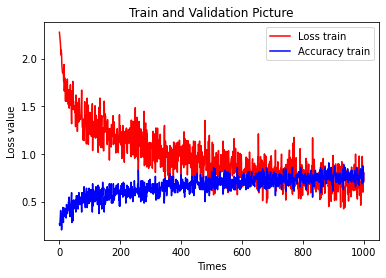

In [20]:
plt.title('Train and Validation Picture')
plt.xlabel('Times')
plt.ylabel('Loss value')
plt.plot(train_loss_list, color=(1, 0, 0), label='Loss train')
plt.plot(train_acc_list, color=(0, 0, 1), label='Accuracy train')
plt.legend(loc='best')
plt.show()